<a href="https://colab.research.google.com/github/Fernando21854/DataMining_KidneyStoneData/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder




myData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset-kidney-stone.csv')

In [ ]:
myData.describe()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,44.500000,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.500000
std,26.124701,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.502801
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,22.250000,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,44.500000,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,0.500000
75%,66.750000,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,89.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


In [ ]:
myData.dtypes

Unnamed: 0      int64
gravity       float64
ph            float64
osmo            int64
cond          float64
urea            int64
calc          float64
target          int64
dtype: object

In [ ]:
myData.isna().sum()

Unnamed: 0    0
gravity       0
ph            0
osmo          0
cond          0
urea          0
calc          0
target        0
dtype: int64

In [ ]:
myData.columns[1:]

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

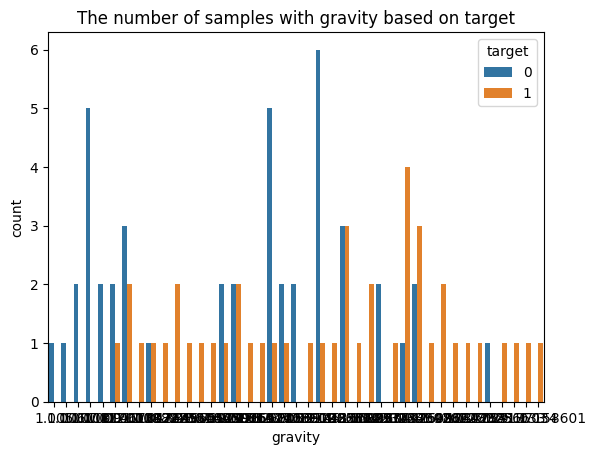

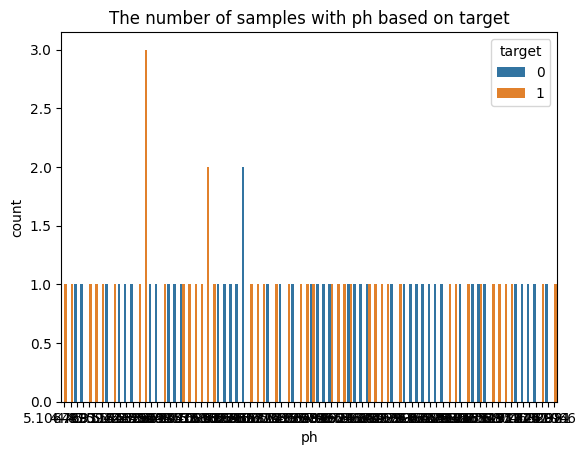

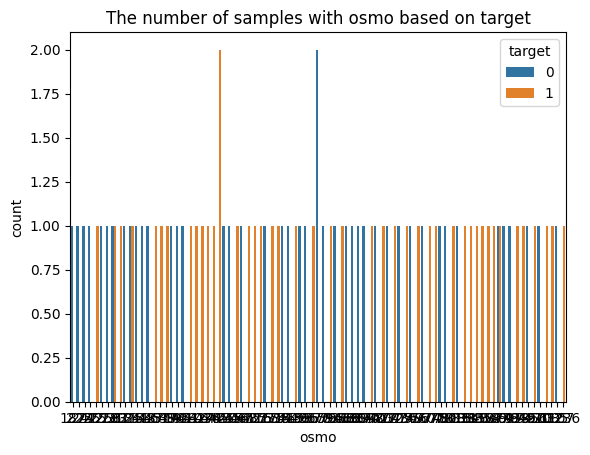

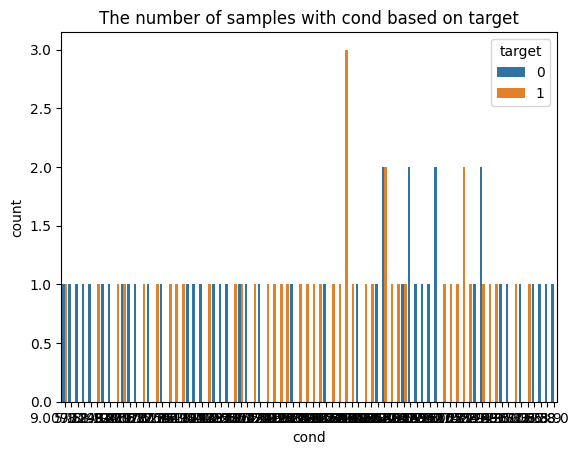

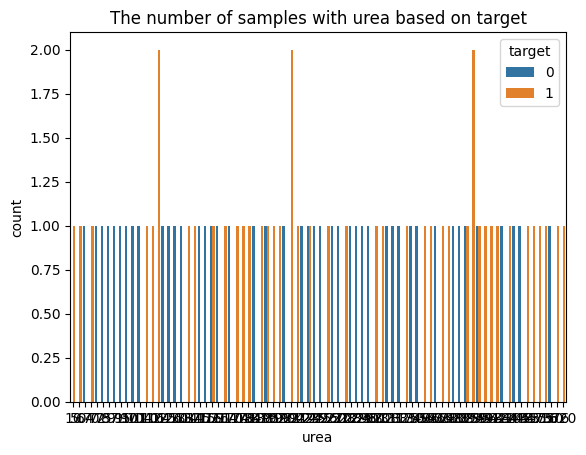

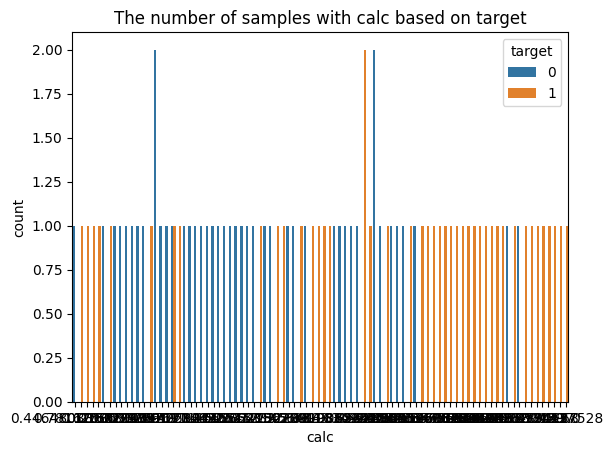

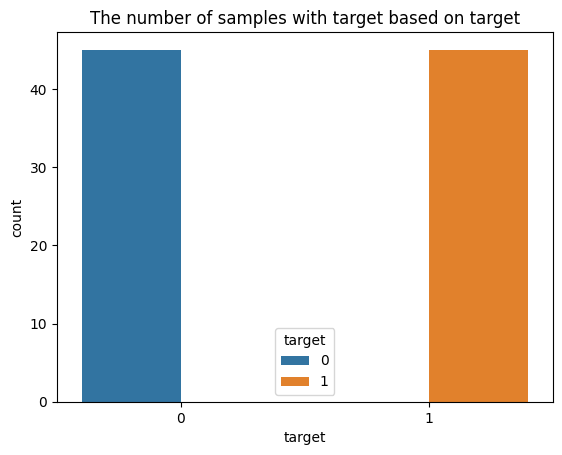

In [ ]:
#loop to iterate through each column in the stroke_data 
for i in myData.columns[1:]:
  #checks if data type is either "float64" or "int64"
  if ( myData[i].dtype == 'float64') or (myData[i].dtype == 'int64'):
    #create a countplot from seaborn library
    sns.countplot(data = myData, x = i,hue='target')
    plt.title('The number of samples with {} based on target'.format(i))
    #display plot
    plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


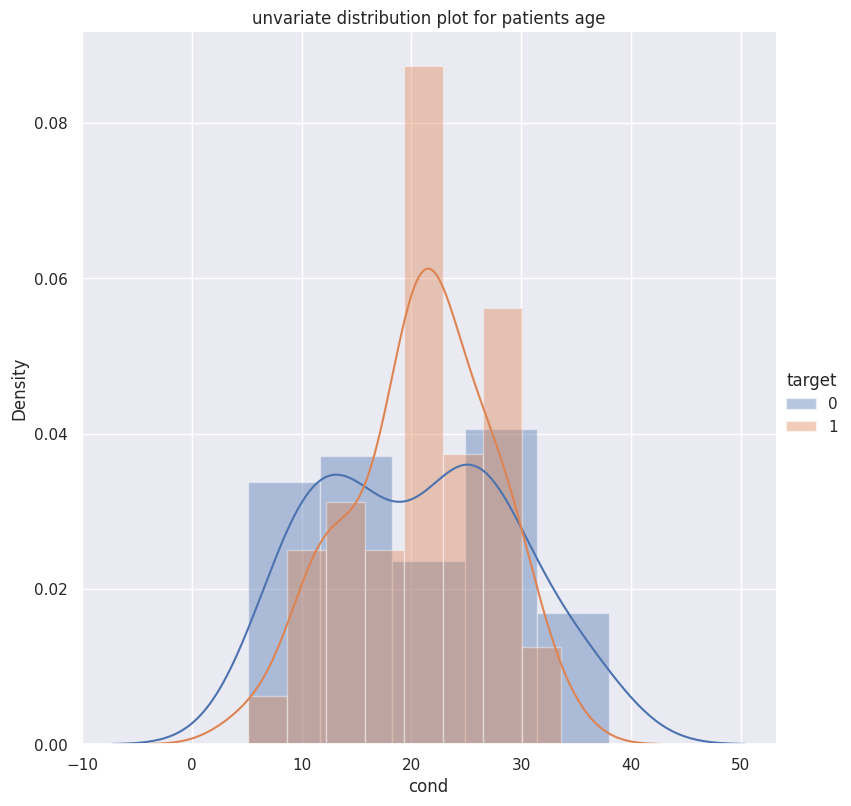

In [ ]:
#sets the size of the figure for the plot using "rc params" from "seaborn library" 18,10 is width and height 
sns.set(rc={'figure.figsize':(18,10)})
#FacetGrid object that allows for the creation of multiple plots by categories and set height
#.map makes a histogram of the distribution of values in the age column and the add_legend shows the categories 
sns.FacetGrid(myData, hue="target", height = 8).map(sns.distplot, "cond").add_legend()
#sets the title of the plot to "univariate distribution plot for patients age
plt.title("unvariate distribution plot for patients age")
#display plot ***DONT FORGET PARENTHESES***
plt.show()

Text(0.5, 1.0, 'Correlation HeatMap')

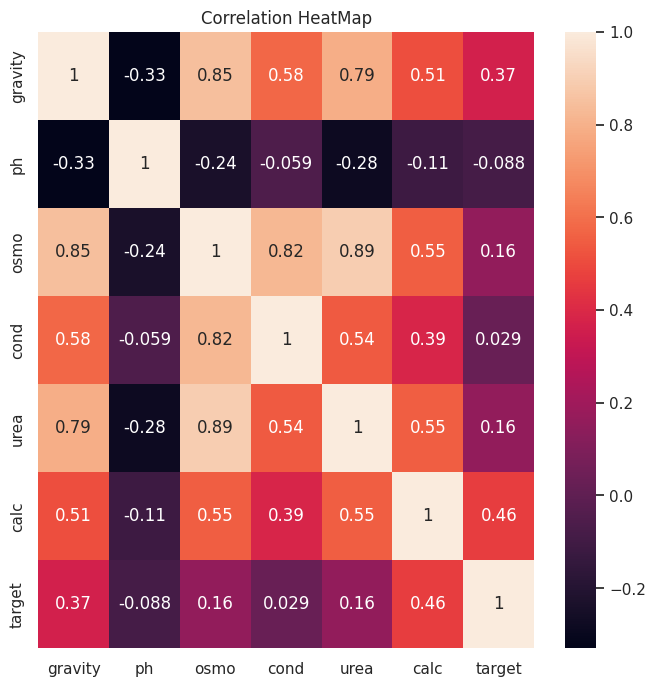

In [ ]:

# use ax variable to assign the subplot object, then set width and height
fig, ax = plt.subplots(figsize=(8,8))
#use sns.heatmap to show a visualization of our data and get the correlation matrix between the columns
heatmap = sns.heatmap(stroke_data[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']].corr(), vmax= 1, annot=True) 
heatmap.set_title("Correlation HeatMap")

In [ ]:
#see correlation of data for better understanding
myData[1:].corr()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
Unnamed: 0,1.000000,0.322339,-0.061401,0.116622,-0.008042,0.095752,0.379876,0.866025
gravity,0.322339,1.000000,-0.325733,0.846453,0.583492,0.792774,0.514139,0.372887
ph,-0.061401,-0.325733,1.000000,-0.230243,-0.075814,-0.267023,-0.125106,-0.107638
osmo,0.116622,0.846453,-0.230243,1.000000,0.830447,0.894729,0.556553,0.163195
cond,-0.008042,0.583492,-0.075814,0.830447,1.000000,0.564861,0.382137,0.018953
urea,0.095752,0.792774,-0.267023,0.894729,0.564861,1.000000,0.566644,0.174907
calc,0.379876,0.514139,-0.125106,0.556553,0.382137,0.566644,1.000000,0.461816
target,0.866025,0.372887,-0.107638,0.163195,0.018953,0.174907,0.461816,1.000000


<Axes: xlabel='target'>

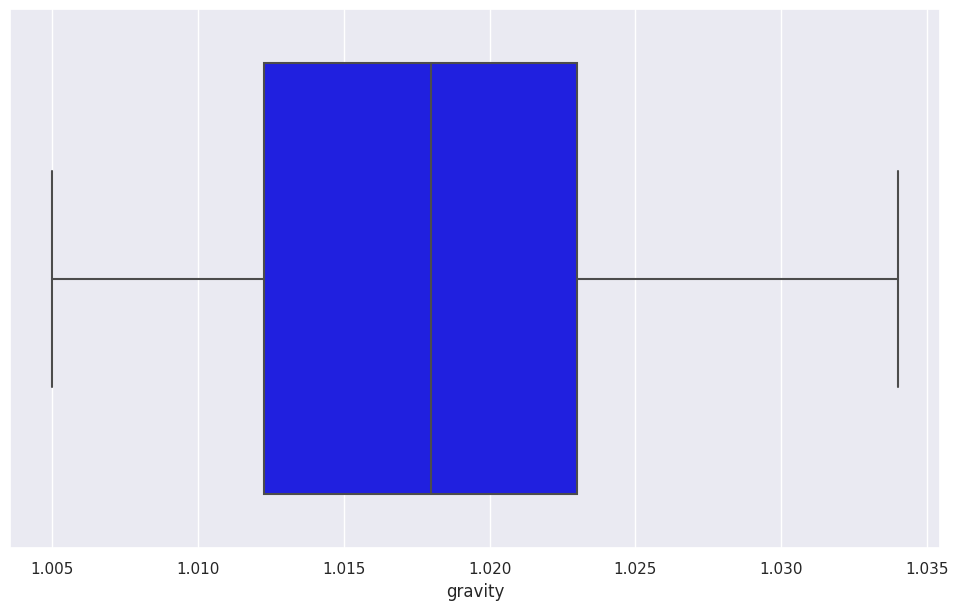

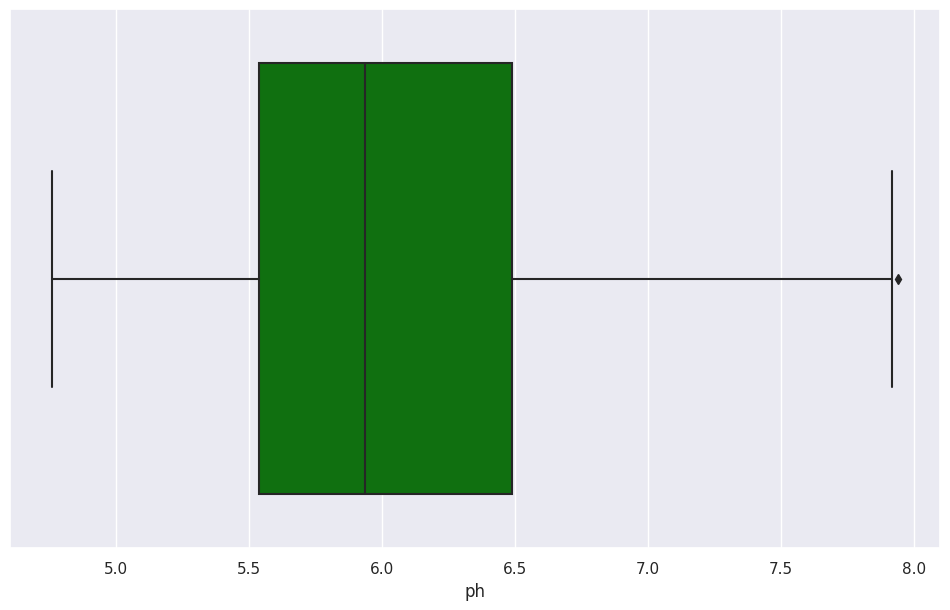

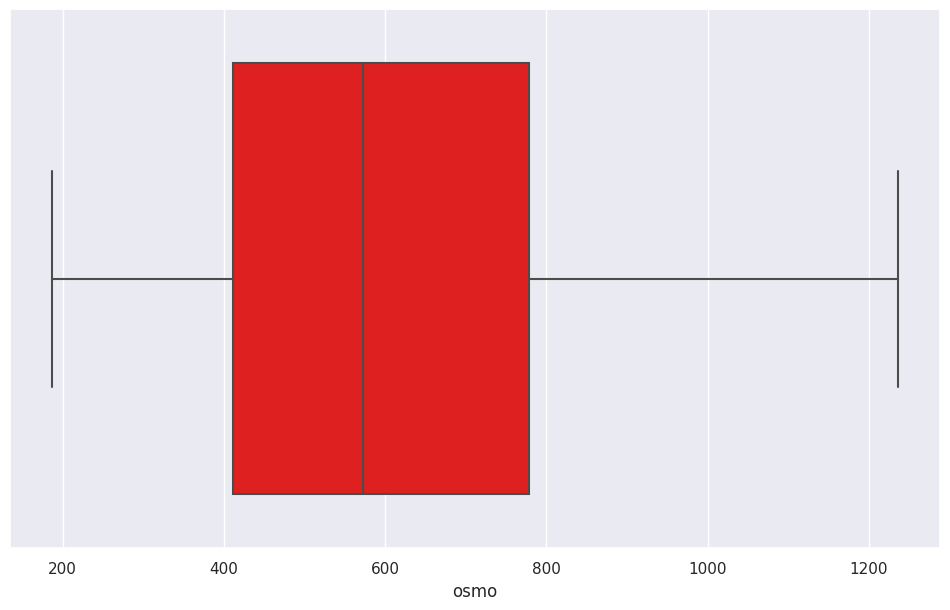

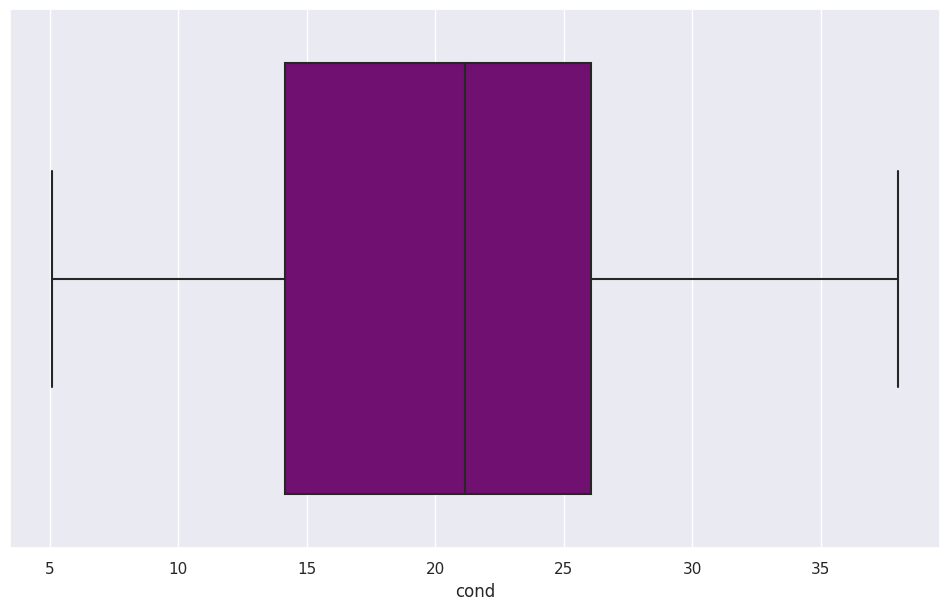

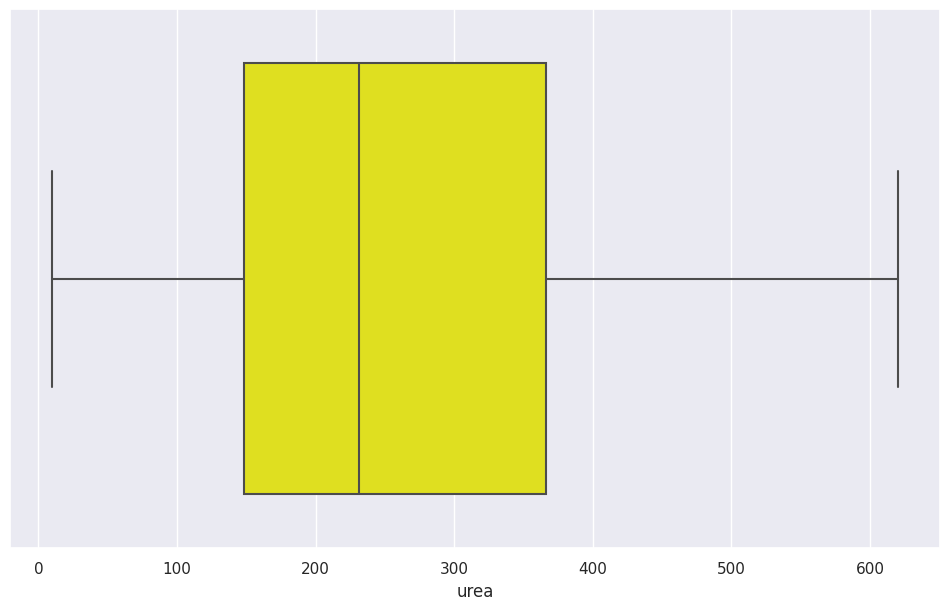

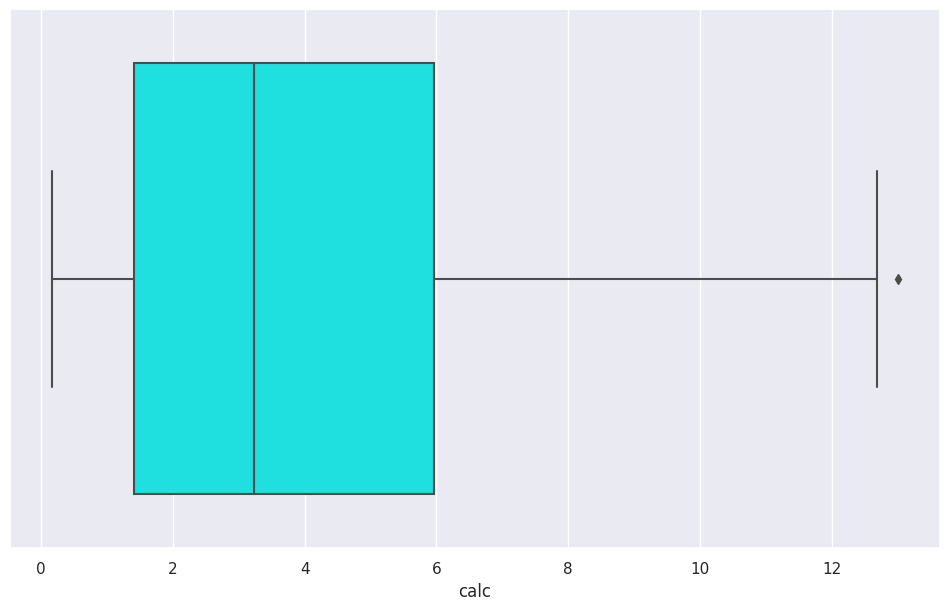

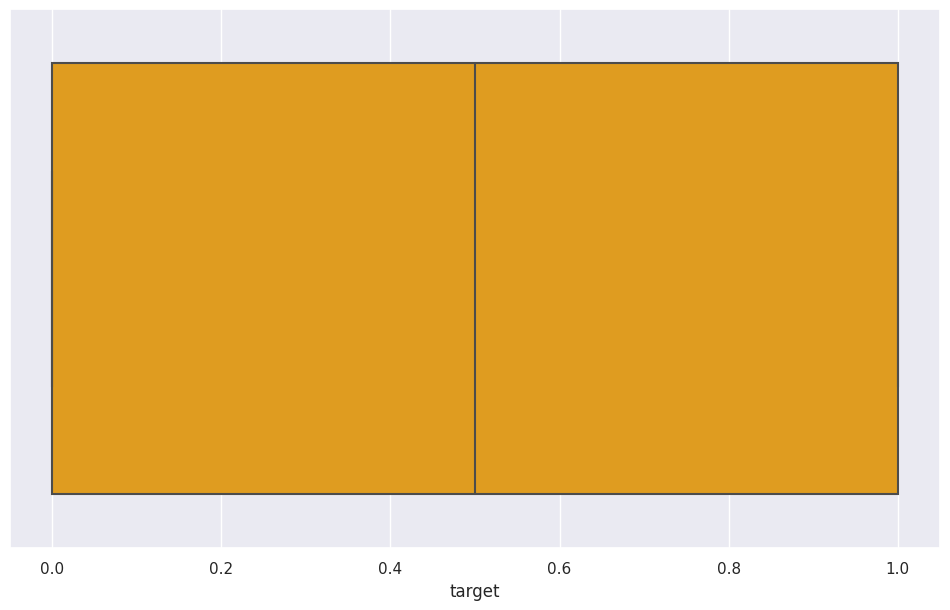

In [ ]:

plt.figure(figsize = (12,7))
sns.boxplot(data=myData, x = myData["gravity"], color="blue")


plt.figure(figsize = (12,7))
sns.boxplot(data = myData, x = myData["ph"], color = "green")


plt.figure(figsize = (12,7))
sns.boxplot(data = myData, x = myData["osmo"], color = "red")


plt.figure(figsize = (12,7))
sns.boxplot(data = myData, x = myData["cond"], color = "purple")


plt.figure(figsize = (12,7))
sns.boxplot(data = myData, x = myData["urea"], color = "yellow")



plt.figure(figsize = (12,7))
sns.boxplot(data = myData, x = myData["calc"], color = "cyan")

plt.figure(figsize = (12,7))
sns.boxplot(data = myData, x = myData["target"], color = "orange")

**PH AND CALC HAVE OUTLIERS NEED TO REMOVE**

In [ ]:
ph = myData.loc[myData["ph"] > 7.9]
calc = myData.loc[myData["calc"] >12]
#filter data to remove outlier
mask = (myData['ph'] >7.9) & (stroke_data['calc'] > 12)

myData[mask]


,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target


In [ ]:
myData.dtypes

Unnamed: 0    int64
gravity       int64
ph            int64
osmo          int64
cond          int64
urea          int64
calc          int64
target        int64
dtype: object

In [ ]:
LE = LabelEncoder()

#use a for loop to iterate through each column to transform
for column in myData.select_dtypes(include=['float64']):
    myData[column] = LE.fit_transform(myData[column])

myData.dtypes


Unnamed: 0    int64
gravity       int64
ph            int64
osmo          int64
cond          int64
urea          int64
calc          int64
target        int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X = myData.iloc[:, :-1].values
y = myData.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

